In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [2]:
class Store():
    def __init__(self,pos,size,text):
        self.pos=pos
        self.size=size
        self.text=text

def draw(img, storedVar):

    for button in storedVar:
        x, y = button.pos
        w, h = button.size
        cv2.rectangle(img, button.pos, (x + w, y + h), (64, 64, 64), thickness=2)
    return img

In [3]:
StoredVar = []

StoredVar.append(Store([250, 200],[150, 100],"2"))
StoredVar.append(Store([830, 200],[150, 100],"3"))
StoredVar.append(Store([480, 280],[270, 70],"4"))
StoredVar.append(Store([370, 360],[70, 200],"5"))
StoredVar.append(Store([560, 420],[110, 70],"6"))
StoredVar.append(Store([800, 360],[70, 200],"7"))
StoredVar.append(Store([480, 570],[270, 70],"8"))
StoredVar.append(Store([250, 610],[150, 100],"9"))
StoredVar.append(Store([830, 610],[150, 100],"10"))

In [4]:
img = np.full((960, 1280, 3), 255, np.uint8)
img = draw(img, StoredVar)
# thickness = 2

# cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (900, 100), (1100, 300), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (530, 530), (680, 680), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (100, 900), (300, 1100), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (900, 900), (1100, 1100), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (450, 350), (750, 500), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (450, 710), (750, 860), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (250, 450), (400, 750), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (810, 450), (960, 750), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(100*1280/1200), round(100*960/1200)), (round(300*1280/1200), round(300*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(900*1280/1200), round(100*960/1200)), (round(1100*1280/1200), round(300*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(530*1280/1200), round(530*960/1200)), (round(680*1280/1200), round(680*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(100*1280/1200), round(900*960/1200)), (round(300*1280/1200), round(1100*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(900*1280/1200), round(900*960/1200)), (round(1100*1280/1200), round(1100*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(450*1280/1200), round(350*960/1200)), (round(750*1280/1200), round(500*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(450*1280/1200), round(710*960/1200)), (round(750*1280/1200), round(860*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(250*1280/1200), round(450*960/1200)), (round(400*1280/1200), round(750*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(810*1280/1200), round(450*960/1200)), (round(960*1280/1200), round(750*960/1200)), (255, 0, 0), thickness=thickness)

img2 = np.zeros_like(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(th)

In [5]:
colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 255, 255], [255, 174, 0], [0,0,0], [159, 73, 252]] # red, green, blue, sky, orange, black, purple

In [6]:
colors = list()
for _ in range(cnt):
    colors.append([int(j) for j in np.random.randint(0, 255, 3)])

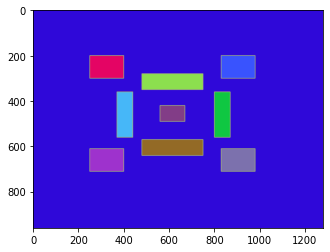

In [7]:
for i in range(cnt):
    img2[labels==i] = colors[i]
    # img2[labels==i] = colors[i]

plt.imshow(img2)

In [8]:
data = pd.DataFrame(columns=['x','y','label'])

In [9]:
for _ in range(30000):
    x = np.random.randint(0, 1280)
    y = np.random.randint(0, 960)
    label = labels[y][x]
    temp = pd.DataFrame({'x':[x], 'y':[y], 'label':[label]})

    data = data.append(temp, ignore_index=True)

In [13]:
data['x'] = data['x']/1279
data['y'] = data['y']/959
data.head()

,x,y,label
0,0.221267,0.059437,1
1,0.046912,0.15537,1
2,0.551994,0.615224,8
3,0.993745,0.266945,1
4,0.989836,0.706986,1


In [10]:
data['x'] = data['x']/1279
data['y'] = data['y']/959
X_data = data.drop(columns=['label']).values
# X_data = np.reshape(X_data, (50000, 2, 1))
X_data = X_data/X_data.max()

y_data = data['label'].values

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float64)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float64)
# X_test = tf.convert_to_tensor(X_test, dtype=tf.float64)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float64)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float64)
# y_test = tf.convert_to_tensor(y_test, dtype=tf.float64)

In [12]:
model = Sequential([
    InputLayer(input_shape=(2,)),
    # Conv1D(2,1, activation='relu'),
    # Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 11)                715       
Total params: 17,483
Trainable params: 17,483
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='auto')

In [15]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, validation_batch_size=128, epochs=300, callbacks=[early_stopping])

Epoch 1/300
188/188 [==============================] - 0s 2ms/step - loss: 0.7487 - accuracy: 0.8790 - val_loss: 0.5445 - val_accuracy: 0.8872
Epoch 2/300
188/188 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.8851 - val_loss: 0.4659 - val_accuracy: 0.8872
Epoch 3/300
188/188 [==============================] - 3s 14ms/step - loss: 0.4282 - accuracy: 0.8851 - val_loss: 0.3878 - val_accuracy: 0.8872
Epoch 4/300
188/188 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8851 - val_loss: 0.3229 - val_accuracy: 0.8890
Epoch 5/300
188/188 [==============================] - 0s 1ms/step - loss: 0.2945 - accuracy: 0.8930 - val_loss: 0.2763 - val_accuracy: 0.8960
Epoch 6/300
188/188 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.9109 - val_loss: 0.2264 - val_accuracy: 0.9262
Epoch 7/300
188/188 [==============================] - 3s 14ms/step - loss: 0.2128 - accuracy: 0.9259 - val_loss: 0.1949 - val_accuracy: 0.93

188/188 [==============================] - 3s 14ms/step - loss: 0.0820 - accuracy: 0.9757 - val_loss: 0.0833 - val_accuracy: 0.9760
Epoch 57/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9752 - val_loss: 0.0775 - val_accuracy: 0.9802
Epoch 58/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9782 - val_loss: 0.0723 - val_accuracy: 0.9817
Epoch 59/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9750 - val_loss: 0.0893 - val_accuracy: 0.9727
Epoch 60/300
188/188 [==============================] - 3s 14ms/step - loss: 0.0817 - accuracy: 0.9758 - val_loss: 0.0785 - val_accuracy: 0.9792
Epoch 61/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9765 - val_loss: 0.0714 - val_accuracy: 0.9803
Epoch 62/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9742 - val_loss: 0.0845 - val_accuracy: 0.9748
Epo

Epoch 113/300
188/188 [==============================] - 3s 14ms/step - loss: 0.0752 - accuracy: 0.9778 - val_loss: 0.0719 - val_accuracy: 0.9798
Epoch 114/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9789 - val_loss: 0.0680 - val_accuracy: 0.9807
Epoch 115/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9780 - val_loss: 0.0694 - val_accuracy: 0.9812
Epoch 116/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9781 - val_loss: 0.0666 - val_accuracy: 0.9810
Epoch 117/300
188/188 [==============================] - 3s 14ms/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.0662 - val_accuracy: 0.9850
Epoch 118/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9805 - val_loss: 0.0647 - val_accuracy: 0.9852
Epoch 119/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9799 - val_loss: 0.0636 - val_

188/188 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9808 - val_loss: 0.0648 - val_accuracy: 0.9803
Epoch 170/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9803 - val_loss: 0.0755 - val_accuracy: 0.9790
Epoch 171/300
188/188 [==============================] - 3s 14ms/step - loss: 0.0713 - accuracy: 0.9790 - val_loss: 0.0597 - val_accuracy: 0.9857
Epoch 172/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9792 - val_loss: 0.0859 - val_accuracy: 0.9745
Epoch 173/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9814 - val_loss: 0.0692 - val_accuracy: 0.9793
Epoch 174/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9807 - val_loss: 0.0699 - val_accuracy: 0.9785
Epoch 175/300
188/188 [==============================] - 3s 14ms/step - loss: 0.0662 - accuracy: 0.9807 - val_loss: 0.0833 - val_accuracy: 0.97

188/188 [==============================] - 3s 14ms/step - loss: 0.0643 - accuracy: 0.9804 - val_loss: 0.0656 - val_accuracy: 0.9792
Epoch 226/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9813 - val_loss: 0.0589 - val_accuracy: 0.9845
Epoch 227/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9795 - val_loss: 0.0703 - val_accuracy: 0.9815
Epoch 228/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9805 - val_loss: 0.0670 - val_accuracy: 0.9825
Epoch 229/300
188/188 [==============================] - 3s 14ms/step - loss: 0.0622 - accuracy: 0.9816 - val_loss: 0.0616 - val_accuracy: 0.9835
Epoch 230/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 0.0567 - val_accuracy: 0.9850
Epoch 231/300
188/188 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.9817 - val_loss: 0.0543 - val_accuracy: 0.98

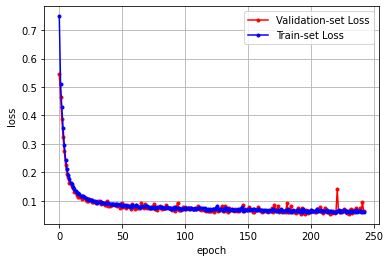

In [16]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

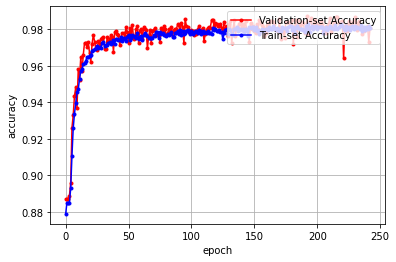

In [17]:
y_vacc = hist.history['val_accuracy']
y_acc = hist.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set Accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set Accuracy")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [18]:
test_data = pd.DataFrame(columns=['x','y','label'])
for _ in range(10000):
    x = np.random.randint(0, 1280)
    y = np.random.randint(0, 960)
    label = labels[y][x]
    temp = pd.DataFrame({'x':[x], 'y':[y], 'label':[label]})

    test_data = test_data.append(temp, ignore_index=True)

In [19]:
test_data['x'] = test_data['x']/1279
test_data['y'] = test_data['y']/959
X_test = test_data.drop(columns=['label']).values
# X_test = np.reshape(X_test,(10000, 2, 1))
y_test = test_data['label'].values
X_test = tf.convert_to_tensor(X_test, dtype=tf.float64)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float64)

In [20]:
model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9791


[0.06972286105155945, 0.9790999889373779]

In [21]:
model.save("keyboard")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: keyboard\assets


In [115]:
colors

[[20, 87, 103],
 [198, 66, 99],
 [245, 91, 105],
 [149, 96, 162],
 [192, 52, 193],
 [58, 229, 106],
 [167, 84, 189],
 [76, 199, 131],
 [170, 51, 94],
 [226, 70, 0],
 [217, 132, 44]]

In [121]:
test1 = np.full((960, 1280, 3), 255, np.uint8)
for y in range(1280):
    for x in range(960):
        pred = np.argmax(model.predict([[x, y]]))
        cv2.line(test1, (x,y), (x,y), colors[pred])

In [ ]:
plt.show(test1)

In [197]:
# size = 150
test_data = pd.DataFrame(columns=['x','y'])
for x in range(1280):
    for y in range(960):
        temp = pd.DataFrame({'x':[x], 'y':[y]})

        test_data = test_data.append(temp, ignore_index=True)

In [202]:
test_data_backup = test_data.copy()

In [198]:
test_data['x'] = test_data['x']/1279
test_data['y'] = test_data['y']/959
test_input = tf.convert_to_tensor(test_data, dtype=tf.float64)

In [199]:
pred = model.predict_classes(test_input)

In [200]:
pred = tf.reshape(pred, [1280, 960]).numpy()

In [223]:
# size = 150
test2 = np.full((960, 1280, 3), 255, np.uint8)
for y in range(960):
    print(y)
    for x in range(1280):
        test2[y][x] = colors[pred[x][y]]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

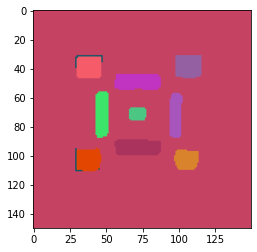

In [196]:
plt.imshow(test1)

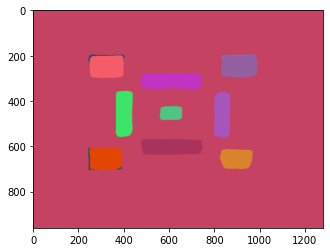

In [224]:
plt.imshow(test2)

In [225]:
# size = 150
test_data3 = pd.DataFrame(columns=['x','y'])
for x in range(800):
    for y in range(600):
        temp = pd.DataFrame({'x':[x], 'y':[y]})

        test_data3 = test_data3.append(temp, ignore_index=True)

In [226]:
test_data3['x'] = test_data3['x']/800
test_data3['y'] = test_data3['y']/600
test_input3 = tf.convert_to_tensor(test_data3, dtype=tf.float64)

In [227]:
pred = model.predict_classes(test_input3)

In [228]:
pred = tf.reshape(pred, [800, 600]).numpy()

In [229]:
# size = 150
test3 = np.full((600, 800, 3), 255, np.uint8)
for y in range(600):
    print(y)
    for x in range(800):
        test3[y][x] = colors[pred[x][y]]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

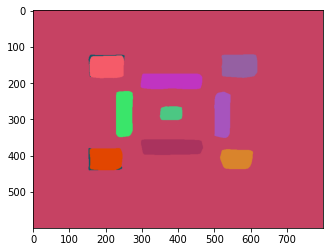

In [231]:
plt.imshow(test3)